In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [100]:
data = 'Attendee Report Final.xlsx'

df = pd.read_excel(data)

In [101]:
df.head()

,Attended,User Name (Original Name),First Name,Last Name,Email,Address,City,Country/Region,Zip/Postal Code,State/Province,...,Is Guest,I agree that I may be video recorded and acknowledge that I am aware that the recording will be available to the public.,I agree that 3DHEALS can share my information with this event's sponsor and partners (who made this event Free to me.) I can unsubscribe at any time.,Linkedin Link,Country/Region Name,Source Name,Product,Season,Topic,Date
0,No,Suba,Suba,K,subaksb899@gmail.com,NaN,Namakkal,IN,637002,Other,...,NaN,Yes,Yes,NaN,India,LinkedIn,3D Bioprinting Skin,1,3D Bioprinting for Skin,2022-01-20
1,No,Eleonore,Eleonore,Bolle,e.bolle@uq.edu.au,NaN,Brisbane,AU,4072,QLD,...,NaN,Yes,Yes,NaN,Australia,Website,3D Bioprinting Skin,1,3D Bioprinting for Skin,2022-01-20
2,Yes,lulu nguyen,lulu,nguyen,Luluhnguyen@gmail.com,"Bforcure, 4Dcell, batiment C, 2eme etage",Montreuil,FR,93100,Other,...,NaN,Yes,Yes,NaN,France,LinkedIn,3D Bioprinting Skin,1,3D Bioprinting for Skin,2022-01-20
3,No,Sultan,Sultan,El-Khatib,sultan@pegamedical.com,NaN,Laval,CA,H7W5J8,QC,...,NaN,Yes,Yes,NaN,Canada,Mailchimp,3D Bioprinting Skin,1,3D Bioprinting for Skin,2022-01-20
4,Yes,Emma Coltoff,Emma,Coltoff,ecoltoff@wakehealth.edu,NaN,Winston Salem,US,27101,NC,...,NaN,Yes,Yes,NaN,United States,Mailchimp,3D Bioprinting Skin,1,3D Bioprinting for Skin,2022-01-20


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 30 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                                                 --------------  -----         
 0   Attended                                                                                                                                               4227 non-null   object        
 1   User Name (Original Name)                                                                                                                              4227 non-null   object        
 2   First Name                                                                                                                                  

In [103]:
df.columns

Index(['Attended', 'User Name (Original Name)', 'First Name', 'Last Name',
       'Email', 'Address', 'City', 'Country/Region', 'Zip/Postal Code',
       'State/Province', 'Phone', 'Industry', 'Organization', 'Job Title',
       'Questions & Comments', 'Registration Time', 'Approval Status',
       'Join Time', 'Leave Time', 'Time in Session (minutes)', 'Is Guest',
       'I agree that I may be video recorded and acknowledge that I am aware that the recording will be available to the public.',
       'I agree that 3DHEALS can share my information with this event's sponsor and partners (who made this event Free to me.) I can unsubscribe at any time.',
       'Linkedin Link', 'Country/Region Name', 'Source Name', 'Product',
       'Season', 'Topic', 'Date'],
      dtype='object')

In [104]:
df_cluster = df.copy()

In [105]:
df_cluster.drop(['User Name (Original Name)','First Name','Last Name','City','State/Province','Is Guest',
               'I agree that I may be video recorded and acknowledge that I am aware that the recording will be available to the public.',
               'I agree that 3DHEALS can share my information with this event\'s sponsor and partners (who made this event Free to me.) I can unsubscribe at any time.',
               'Linkedin Link','Country/Region Name','Date'], axis=1, inplace=True)

In [106]:
df_cluster.head()

,Attended,Email,Address,Country/Region,Zip/Postal Code,Phone,Industry,Organization,Job Title,Questions & Comments,Registration Time,Approval Status,Join Time,Leave Time,Time in Session (minutes),Source Name,Product,Season,Topic
0,No,subaksb899@gmail.com,NaN,IN,637002,NaN,"Medical, Pharma, Biotech",DrNGPIT,Student,NaN,2022-01-14 22:06:00,approved,--,--,NaN,LinkedIn,3D Bioprinting Skin,1,3D Bioprinting for Skin
1,No,e.bolle@uq.edu.au,NaN,AU,4072,NaN,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,NaN,2022-01-13 16:27:00,approved,--,--,NaN,Website,3D Bioprinting Skin,1,3D Bioprinting for Skin
2,Yes,Luluhnguyen@gmail.com,"Bforcure, 4Dcell, batiment C, 2eme etage",FR,93100,610872767,"Medical, Pharma, Biotech",4dcell,Production manager,NaN,2022-01-20 13:06:00,approved,2022-01-20 13:08:00,2022-01-20 13:30:00,23.0,LinkedIn,3D Bioprinting Skin,1,3D Bioprinting for Skin
3,No,sultan@pegamedical.com,NaN,CA,H7W5J8,NaN,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,NaN,2022-01-13 06:20:00,approved,--,--,NaN,Mailchimp,3D Bioprinting Skin,1,3D Bioprinting for Skin
4,Yes,ecoltoff@wakehealth.edu,NaN,US,27101,NaN,Education,Wake Forest University,Graduate Student,NaN,2022-01-16 06:41:00,approved,2022-01-20 13:00:00,2022-01-20 13:24:00,25.0,Mailchimp,3D Bioprinting Skin,1,3D Bioprinting for Skin


In [107]:
df_cluster.drop(['Address','Zip/Postal Code', 'Phone', 'Questions & Comments', 'Registration Time', 
                'Approval Status', 'Join Time', 'Leave Time', 'Time in Session (minutes)', 'Product', 
                'Season', 'Topic'], axis=1, inplace=True)

In [108]:
df_cluster.head()

,Attended,Email,Country/Region,Industry,Organization,Job Title,Source Name
0,No,subaksb899@gmail.com,IN,"Medical, Pharma, Biotech",DrNGPIT,Student,LinkedIn
1,No,e.bolle@uq.edu.au,AU,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,Website
2,Yes,Luluhnguyen@gmail.com,FR,"Medical, Pharma, Biotech",4dcell,Production manager,LinkedIn
3,No,sultan@pegamedical.com,CA,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,Mailchimp
4,Yes,ecoltoff@wakehealth.edu,US,Education,Wake Forest University,Graduate Student,Mailchimp


In [109]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attended        4227 non-null   object
 1   Email           4223 non-null   object
 2   Country/Region  3669 non-null   object
 3   Industry        3667 non-null   object
 4   Organization    3628 non-null   object
 5   Job Title       3198 non-null   object
 6   Source Name     3577 non-null   object
dtypes: object(7)
memory usage: 231.3+ KB


In [110]:
df_cluster = df_cluster.dropna()

In [111]:
import re

def extract_domain_from_email(email):
    # Regular expression pattern to match the domain part of an email
    pattern = r'@([\w.-]+)'

    # Extract the domain using regex
    match = re.search(pattern, email)

    if match:
        domain = match.group(1)  # Get the matched domain
        return domain
    else:
        return None

In [112]:
df_cluster['domain_name'] = df_cluster['Email'].apply(extract_domain_from_email)

In [113]:
df_cluster.head()

,Attended,Email,Country/Region,Industry,Organization,Job Title,Source Name,domain_name
0,No,subaksb899@gmail.com,IN,"Medical, Pharma, Biotech",DrNGPIT,Student,LinkedIn,gmail.com
1,No,e.bolle@uq.edu.au,AU,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,Website,uq.edu.au
2,Yes,Luluhnguyen@gmail.com,FR,"Medical, Pharma, Biotech",4dcell,Production manager,LinkedIn,gmail.com
3,No,sultan@pegamedical.com,CA,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,Mailchimp,pegamedical.com
4,Yes,ecoltoff@wakehealth.edu,US,Education,Wake Forest University,Graduate Student,Mailchimp,wakehealth.edu


In [114]:
df_cluster = df_cluster.drop('Email', axis = 1)

In [115]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 0 to 4226
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attended        3078 non-null   object
 1   Country/Region  3078 non-null   object
 2   Industry        3078 non-null   object
 3   Organization    3078 non-null   object
 4   Job Title       3078 non-null   object
 5   Source Name     3078 non-null   object
 6   domain_name     3078 non-null   object
dtypes: object(7)
memory usage: 192.4+ KB


In [116]:
df_cluster.nunique()

Attended             2
Country/Region      87
Industry            30
Organization      1876
Job Title         1291
Source Name          9
domain_name        745
dtype: int64

## K-Modes

In [117]:
!pip install kmodes

In [118]:
!pip show kmodes

Name: kmodes
Version: 0.12.2
Summary: Python implementations of the k-modes and k-prototypes clustering algorithms for clustering categorical data.
Home-page: https://github.com/nicodv/kmodes
Author: Nelis J de Vos
Author-email: njdevos@gmail.com
License: MIT
Location: c:\users\14083\anaconda3\lib\site-packages
Requires: scipy, numpy, joblib, scikit-learn
Required-by: 


In [119]:
df_cluster.head(5)

,Attended,Country/Region,Industry,Organization,Job Title,Source Name,domain_name
0,No,IN,"Medical, Pharma, Biotech",DrNGPIT,Student,LinkedIn,gmail.com
1,No,AU,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,Website,uq.edu.au
2,Yes,FR,"Medical, Pharma, Biotech",4dcell,Production manager,LinkedIn,gmail.com
3,No,CA,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,Mailchimp,pegamedical.com
4,Yes,US,Education,Wake Forest University,Graduate Student,Mailchimp,wakehealth.edu


In [120]:
df_cluster['Country/Region'] = df_cluster['Country/Region'].astype(str)
df_cluster['Industry'] = df_cluster['Industry'].astype(str)
df_cluster['Organization'] = df_cluster['Organization'].astype(str)
df_cluster['Job Title'] = df_cluster['Job Title'].astype(str)
df_cluster['Source Name'] = df_cluster['Source Name'].astype(str)
df_cluster['domain_name'] = df_cluster['domain_name'].astype(str)



In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df_cluster['Attended'].astype(str))

In [122]:
df_cluster.drop(['Attended'], axis=1, inplace=True)

In [123]:
df_cluster.reset_index(drop=True, inplace=True)
df_cluster.index

RangeIndex(start=0, stop=3078, step=1)

In [124]:
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  3078 non-null   object
 1   Industry        3078 non-null   object
 2   Organization    3078 non-null   object
 3   Job Title       3078 non-null   object
 4   Source Name     3078 non-null   object
 5   domain_name     3078 non-null   object
dtypes: object(6)
memory usage: 144.4+ KB


In [125]:
from kmodes.kmodes import KModes

## No. of Clusters - 2


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 13696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

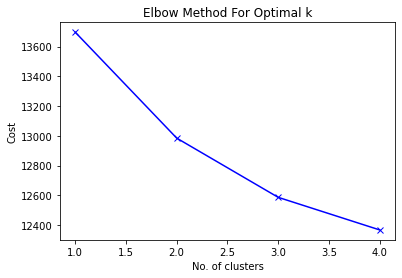

In [126]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", verbose=1)
    kmode.fit_predict(df_cluster)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [127]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "Cao", verbose=1)
clusters = kmode.fit_predict(df_cluster)
clusters


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 12963.0


array([1, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [128]:
kmode.cluster_centroids_

array([['US', 'Medical,  Pharma,  Biotech', 'VoxCell BioInnovation',
        'CEO', 'Mailchimp', 'gmail.com'],
       ['IN', 'Education', 'The Hong Kong Polytechnic University',
        'Student', 'Mailchimp', 'gmail.com']], dtype='<U36')

In [129]:
df_cluster.insert(0, "Cluster", clusters, True)
df_cluster

,Cluster,Country/Region,Industry,Organization,Job Title,Source Name,domain_name
0,1,IN,"Medical, Pharma, Biotech",DrNGPIT,Student,LinkedIn,gmail.com
1,0,AU,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,Website,uq.edu.au
2,0,FR,"Medical, Pharma, Biotech",4dcell,Production manager,LinkedIn,gmail.com
3,0,CA,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,Mailchimp,pegamedical.com
4,0,US,Education,Wake Forest University,Graduate Student,Mailchimp,wakehealth.edu
...,...,...,...,...,...,...,...
3073,0,KR,"Medical, Pharma, Biotech",Marketing Department,Chief Marketing Officer,website,clecell.co.kr
3074,0,RU,"Medical, Pharma, Biotech",Inobitec,Project Manager,linkedin,inobitec.com
3075,0,GB,"Medical, Pharma, Biotech",UCL,MSc Student,website,gmail.com
3076,0,GB,Other,BLR Additive,Director,website,outlook.com


In [130]:
# Print the cluster labels
print(df_cluster['Cluster'].value_counts())

0    2505
1     573
Name: Cluster, dtype: int64


In [131]:
#No of attendees who attended the meeting:

#Cluster 0:
num_attended_cluster_0 = 0;

for i in df_cluster['Cluster'].index:
    if df_cluster['Cluster'][i] == 0:
        if y[i] == 1:
            num_attended_cluster_0=num_attended_cluster_0+1


In [132]:
num_attended_cluster_0

1157

In [133]:
#Cluster 1:
num_attended_cluster_1 = 0;

for i in df_cluster['Cluster'].index:
    if df_cluster['Cluster'][i] == 1:
        if y[i] == 1:
            num_attended_cluster_1=num_attended_cluster_1+1

In [134]:
num_attended_cluster_1

236

In [135]:
cluster_0 = df_cluster[df_cluster['Cluster'] == 0]
cluster_1 = df_cluster[df_cluster['Cluster'] == 1]

In [137]:
df_cluster

,Cluster,Country/Region,Industry,Organization,Job Title,Source Name,domain_name
0,1,IN,"Medical, Pharma, Biotech",DrNGPIT,Student,LinkedIn,gmail.com
1,0,AU,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,Website,uq.edu.au
2,0,FR,"Medical, Pharma, Biotech",4dcell,Production manager,LinkedIn,gmail.com
3,0,CA,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,Mailchimp,pegamedical.com
4,0,US,Education,Wake Forest University,Graduate Student,Mailchimp,wakehealth.edu
...,...,...,...,...,...,...,...
3073,0,KR,"Medical, Pharma, Biotech",Marketing Department,Chief Marketing Officer,website,clecell.co.kr
3074,0,RU,"Medical, Pharma, Biotech",Inobitec,Project Manager,linkedin,inobitec.com
3075,0,GB,"Medical, Pharma, Biotech",UCL,MSc Student,website,gmail.com
3076,0,GB,Other,BLR Additive,Director,website,outlook.com


## Validating the clusters

In [138]:

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Converting to numerical features

In [139]:
df_cluster_copy = df_cluster.copy()
df_cluster_copy['Country/Region'] = le.fit_transform(df_cluster_copy['Country/Region'].astype(str))
df_cluster_copy['Industry'] = le.fit_transform(df_cluster_copy['Industry'].astype(str))
df_cluster_copy['Organization'] = le.fit_transform(df_cluster_copy['Organization'].astype(str))
df_cluster_copy['Job Title'] = le.fit_transform(df_cluster_copy['Job Title'].astype(str))
df_cluster_copy['Source Name'] = le.fit_transform(df_cluster_copy['Source Name'].astype(str))
df_cluster_copy['domain_name'] = le.fit_transform(df_cluster_copy['domain_name'].astype(str))

In [140]:
df_cluster_copy = df_cluster_copy.drop('Cluster', axis=1)

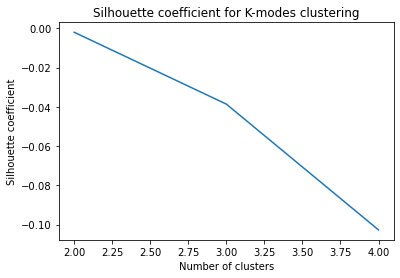

In [141]:
# Calculate the silhouette coefficient
silhouette_coefficients = []
for k in range(2, 5):
    kmodes = KModes(n_clusters=k)
    kmodes.fit(df_cluster_copy)
    silhouette_coefficients.append(silhouette_score(df_cluster_copy, kmodes.labels_))

# Plot the silhouette coefficient
plt.plot(range(2, 5), silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette coefficient for K-modes clustering')
plt.show()

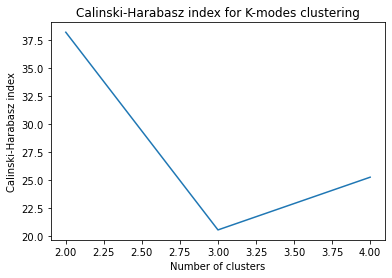

In [142]:
# Calculate the Calinski-Harabasz index
calinski_harabasz_indices = []
for k in range(2, 5):
    kmodes = KModes(n_clusters=k)
    kmodes.fit(df_cluster_copy)
    calinski_harabasz_indices.append(calinski_harabasz_score(df_cluster_copy, kmodes.labels_))

# Plot the Calinski-Harabasz index
plt.plot(range(2, 5), calinski_harabasz_indices)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz index')
plt.title('Calinski-Harabasz index for K-modes clustering')
plt.show()

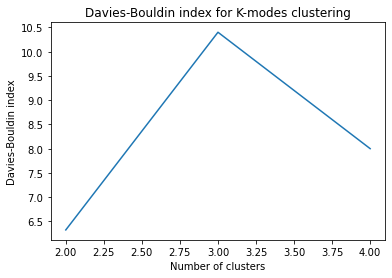

In [143]:
# Calculate the Davies-Bouldin index
davies_bouldin_indices = []
for k in range(2, 5):
    kmodes = KModes(n_clusters=k)
    kmodes.fit(df_cluster_copy)
    davies_bouldin_indices.append(davies_bouldin_score(df_cluster_copy, kmodes.labels_))

# Plot the Davies-Bouldin index
plt.plot(range(2, 5), davies_bouldin_indices)
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.title('Davies-Bouldin index for K-modes clustering')
plt.show()

## Predictive Modeling for Customer Behavior

In [144]:
df_cluster_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Country/Region  3078 non-null   int32
 1   Industry        3078 non-null   int32
 2   Organization    3078 non-null   int32
 3   Job Title       3078 non-null   int32
 4   Source Name     3078 non-null   int32
 5   domain_name     3078 non-null   int32
dtypes: int32(6)
memory usage: 72.3 KB


In [145]:
cluster_response = df_cluster['Cluster']

In [146]:

train_data = df_cluster_copy

In [186]:
pd.set_option('display.max_rows', 4000)

In [187]:
train_data.head(4000)

,Country/Region,Industry,Organization,Job Title,Source Name,domain_name
0,44,20,411,1074,2,227
1,6,20,1581,752,5,675
2,30,20,41,811,2,227
3,14,20,1109,859,4,466
4,82,8,1691,468,4,709
5,25,8,1721,1091,5,741
6,79,15,667,898,2,301
7,48,21,1037,178,5,422
8,9,8,1479,730,4,248
9,79,20,1826,1267,2,568


In [188]:
df_cluster.head(4000)

,Cluster,Country/Region,Industry,Organization,Job Title,Source Name,domain_name
0,1,IN,"Medical, Pharma, Biotech",DrNGPIT,Student,LinkedIn,gmail.com
1,0,AU,"Medical, Pharma, Biotech",University of Queensland,Post doctoral researcher,Website,uq.edu.au
2,0,FR,"Medical, Pharma, Biotech",4dcell,Production manager,LinkedIn,gmail.com
3,0,CA,"Medical, Pharma, Biotech",Pega Medical,R&D Engineering Associate,Mailchimp,pegamedical.com
4,0,US,Education,Wake Forest University,Graduate Student,Mailchimp,wakehealth.edu
5,1,EG,Education,Zewail city for science and technology,Teaching assistant,Website,zewailcity.edu.eg
6,0,TR,High Tech - Other,IZTECH,Research Assistant,LinkedIn,iyte.edu.tr
7,0,JP,Other,Nikoderm Research Inc.,CEO,Website,nikkolgroup.com
8,1,BE,Education,Ugent,PhD student,Mailchimp,hotmail.com
9,0,TR,"Medical, Pharma, Biotech",student,student,LinkedIn,std.izmirekonomi.edu.tr


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Splitting of training and tetsing data

In [149]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data,df_cluster['Cluster'],
                                                                      test_size=0.3,
                                                                      random_state=2)

### One-Hot Encoding 

In [150]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [151]:
x_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1555 to 1637
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Country/Region  924 non-null    int32
 1   Industry        924 non-null    int32
 2   Organization    924 non-null    int32
 3   Job Title       924 non-null    int32
 4   Source Name     924 non-null    int32
 5   domain_name     924 non-null    int32
dtypes: int32(6)
memory usage: 28.9 KB


In [152]:
# Encode categorical variables using one-hot encoding
categorical_features = ['Country/Region', 'Industry', 'Organization', 'Job Title',
                       'Source Name', 'domain_name']  # Replace with your categorical variable column names
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
                                 remainder='passthrough')
X_train_encoded = preprocessor.fit_transform(x_train)
X_test_encoded = preprocessor.transform(x_valid)

## Decision Tree Classifier

In [153]:
# Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

In [154]:
# Fit the model to the training data
dt_classifier.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [155]:
# Predict the target variable for the test set
y_pred_dt = dt_classifier.predict(X_test_encoded)

In [156]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score

In [157]:
# calculating f1 score
dt_f1_score = f1_score(y_valid, y_pred_dt)

In [158]:
dt_f1_score

0.9969604863221885

In [159]:
confusion_matrix(y_valid, y_pred_dt)

array([[759,   1],
       [  0, 164]], dtype=int64)

### Random Forest Classifier

In [160]:
# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train_encoded, y_train)

# Predict the target variable for the test set
y_pred_rf = rf_classifier.predict(X_test_encoded)


# calculating f1 score
rf_f1_score = f1_score(y_valid, y_pred_rf)

In [161]:
rf_f1_score

0.9556962025316457

In [162]:
confusion_matrix(y_valid, y_pred_rf)

array([[759,   1],
       [ 13, 151]], dtype=int64)

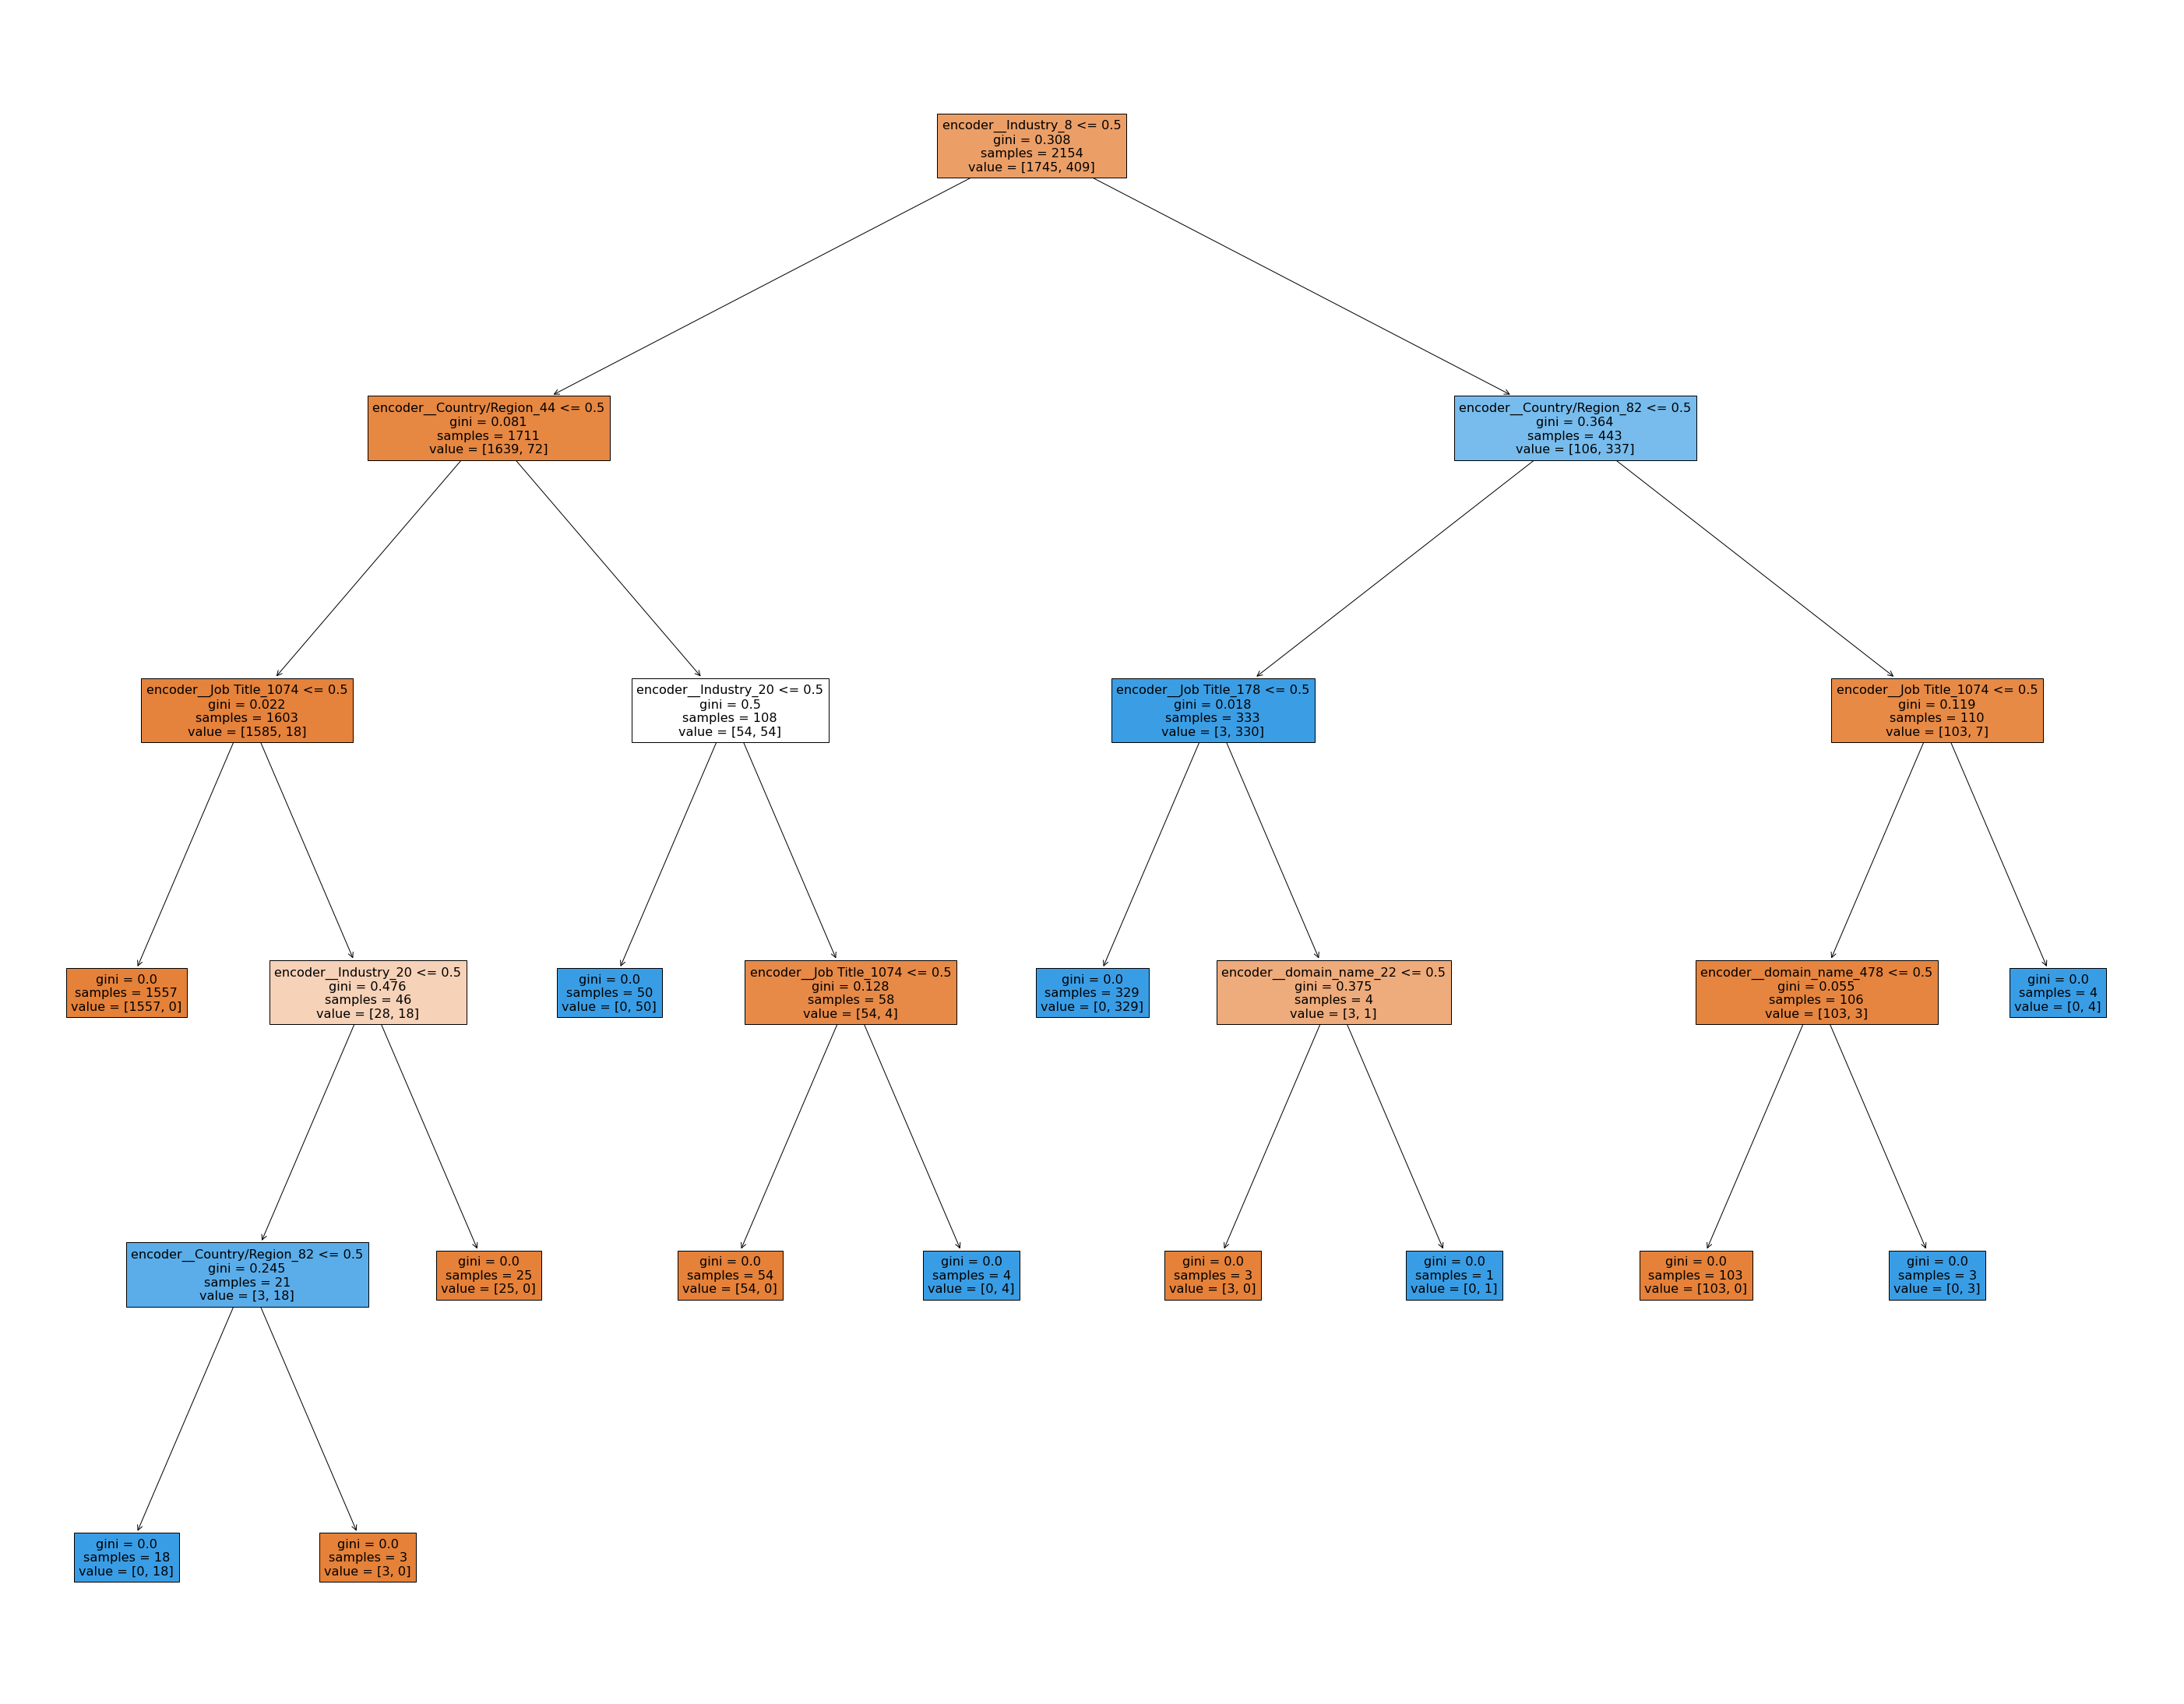

In [168]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(X_train_encoded, y_train)

# Visualize the decision tree
plt.figure(figsize=(50, 40))
tree.plot_tree(dt_classifier, feature_names=preprocessor.get_feature_names_out(), filled=True)
plt.show()

In [171]:
# Get the feature names
feature_names = preprocessor.get_feature_names_out()

# Access the tree structure
tree_structure = dt_classifier.tree_

# Recursive function to traverse the tree
def traverse_tree(node_index=0, depth=0):
    if tree_structure.children_left[node_index] == -1:  # Leaf node
        class_label = tree_structure.value[node_index].argmax()
        print(f"Leaf Node: Class={class_label}")
    else:  # Internal node
        feature_index = tree_structure.feature[node_index]
        threshold = tree_structure.threshold[node_index]
        print(f"Internal Node (Depth={depth}): Feature={feature_names[feature_index]}, Threshold={threshold}")

        traverse_tree(tree_structure.children_left[node_index], depth + 1)
        traverse_tree(tree_structure.children_right[node_index], depth + 1)

# Call the recursive function to traverse the tree
traverse_tree()

Internal Node (Depth=0): Feature=encoder__Industry_8, Threshold=0.5
Internal Node (Depth=1): Feature=encoder__Country/Region_44, Threshold=0.5
Internal Node (Depth=2): Feature=encoder__Job Title_1074, Threshold=0.5
Leaf Node: Class=0
Internal Node (Depth=3): Feature=encoder__Industry_20, Threshold=0.5
Internal Node (Depth=4): Feature=encoder__Country/Region_82, Threshold=0.5
Leaf Node: Class=1
Leaf Node: Class=0
Leaf Node: Class=0
Internal Node (Depth=2): Feature=encoder__Industry_20, Threshold=0.5
Leaf Node: Class=1
Internal Node (Depth=3): Feature=encoder__Job Title_1074, Threshold=0.5
Leaf Node: Class=0
Leaf Node: Class=1
Internal Node (Depth=1): Feature=encoder__Country/Region_82, Threshold=0.5
Internal Node (Depth=2): Feature=encoder__Job Title_178, Threshold=0.5
Leaf Node: Class=1
Internal Node (Depth=3): Feature=encoder__domain_name_22, Threshold=0.5
Leaf Node: Class=0
Leaf Node: Class=1
Internal Node (Depth=2): Feature=encoder__Job Title_1074, Threshold=0.5
Internal Node (Depth

In [172]:
# Retrieve the mapping of encoded categories to their original values
encoder = preprocessor.named_transformers_['encoder']
industry_categories = encoder.categories_[1]  # Assuming 'Industry' is the second categorical feature

# Decode the encoded feature value
encoded_category_index = 8
original_category = industry_categories[encoded_category_index]

print(f"The encoded feature 'encoder__Industry_8' represents the category '{original_category}' of the 'Industry' feature.")

The encoded feature 'encoder__Industry_8' represents the category '8' of the 'Industry' feature.


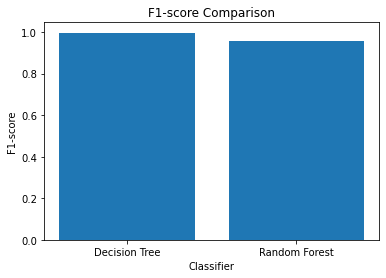

In [189]:
# Define the F1-scores
f1_scores = [dt_f1_score, rf_f1_score]

# Define the classifiers
classifiers = ['Decision Tree', 'Random Forest']

# Plot the F1-scores
plt.bar(classifiers, f1_scores)
plt.xlabel('Classifier')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.show()

In [ ]:
plt.figure(figsize=(18,5))


sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('F1-score comparison')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

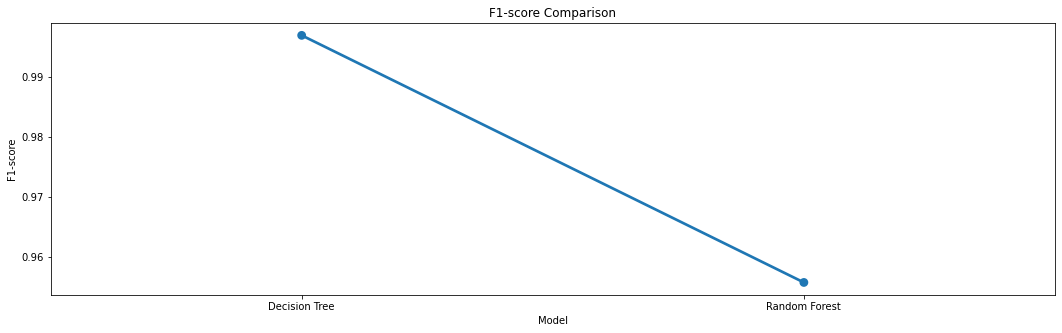

In [190]:
# Create a DataFrame with the model names and corresponding F1-scores
compare_1 = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'],
                          'F1_Score': [dt_f1_score, rf_f1_score]})

# Set the figure size
plt.figure(figsize=(18, 5))

# Create the point plot
sns.pointplot(x='Model', y='F1_Score', data=compare_1)

# Set the title, x-label, and y-label
plt.title('F1-score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-score')

# Display the plot
plt.show()

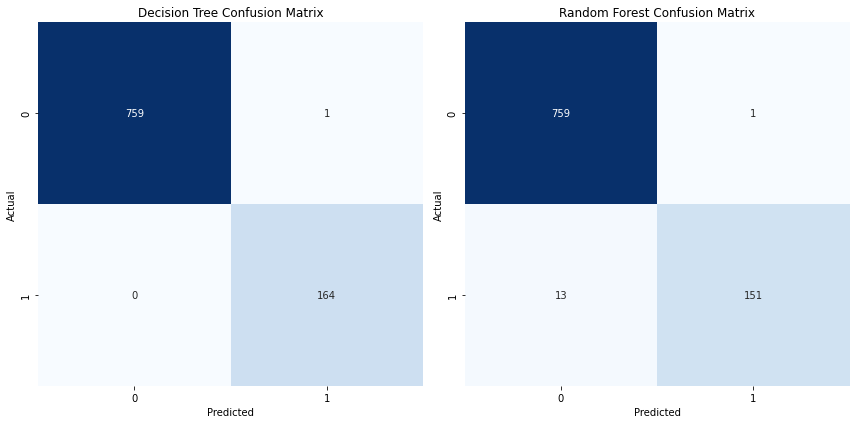

In [191]:
# Calculate the confusion matrices
cm_dt = confusion_matrix(y_valid, y_pred_dt)
cm_rf = confusion_matrix(y_valid, y_pred_rf)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the decision tree confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the random forest confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()